In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inputdf=pd.read_csv("Accidents0515.csv")

In [3]:
inputdf.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [4]:
inputdf.isna().sum()

Accident_Index                                      0
Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [5]:
inputdf.drop(["Accident_Index","LSOA_of_Accident_Location","Accident_Index",'Local_Authority_(Highway)',"Date"],axis=1,inplace=True)

In [6]:
inputdf.dropna(inplace=True)

In [7]:
inputdf.isna().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-

In [8]:
inputdf.dtypes

Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_Detail                                  int64
Junction_Control                                 int64
2nd_Road_Class                                   int64
2nd_Road_N

In [9]:
inputdf.Longitude=np.floor_divide(inputdf.Longitude,0.0001)/10000
inputdf.Latitude=np.floor_divide(inputdf.Latitude,0.0001)/10000

In [10]:
inputdf.Time = inputdf.Time.str[:2].astype(int)

In [11]:
inputdf.dtypes

Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Day_of_Week                                      int64
Time                                             int32
Local_Authority_(District)                       int64
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_Detail                                  int64
Junction_Control                                 int64
2nd_Road_Class                                   int64
2nd_Road_N

In [12]:
association=inputdf.loc[:50, 'Accident_Severity':]

In [13]:
association.columns

Index(['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', 'Time', 'Local_Authority_(District)', '1st_Road_Class',
       '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')

In [15]:
df= inputdf[['Day_of_Week',
       'Time', 'Road_Type', 'Speed_limit',
       'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area','Accident_Severity']]
df.head()


,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Accident_Severity
0,3,17,6,30,1,2,2,0,0,1,2
1,4,17,3,30,4,1,1,0,0,1,3
2,5,0,6,30,4,1,1,0,0,1,3
3,6,10,6,30,1,1,1,0,0,1,3
4,2,21,6,30,7,1,2,0,0,1,3


In [25]:
records=df.head(40000).values;records

array([[ 3, 17,  6, ...,  0,  1,  2],
       [ 4, 17,  3, ...,  0,  1,  3],
       [ 5,  0,  6, ...,  0,  1,  3],
       ...,
       [ 4,  3,  6, ...,  0,  1,  3],
       [ 6, 11,  6, ...,  0,  1,  3],
       [ 1,  2,  6, ...,  0,  1,  3]], dtype=int64)

In [18]:
records=records.astype(int)
records

array([[ 3, 17,  6, ...,  0,  1,  2],
       [ 4, 17,  3, ...,  0,  1,  3],
       [ 5,  0,  6, ...,  0,  1,  3],
       ...,
       [ 4,  3,  6, ...,  0,  1,  3],
       [ 6, 11,  6, ...,  0,  1,  3],
       [ 1,  2,  6, ...,  0,  1,  3]])

In [19]:
from mlxtend.cluster import Kmeans

In [20]:
km = Kmeans(k=2, max_iter=50,  random_seed=1, print_progress=3)
km.fit(X=records,init_params=True)

Iteration: 7/50 | Elapsed: 00:00:00 | ETA: 00:00:00

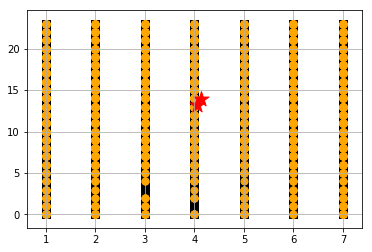

In [21]:
y_clust = km.predict(records)

plt.scatter(records[y_clust == 0, 0],
            records[y_clust == 0, 1],
            s=50,
            c='black',
            marker='s',
            label='cluster 1')

plt.scatter(records[y_clust == 1,0],
            records[y_clust == 1,1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

# plt.scatter(records[y_clust == 2,0],
#             records[y_clust == 2,1],
#             s=50,
#             c='lightblue',
#             marker='v',
#             label='cluster 3')




plt.scatter(km.centroids_[:,0],
            km.centroids_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')

# plt.legend(loc='lower left',
#            scatterpoints=1)
plt.grid()
plt.show()

In [22]:
dftemp = df[0:40000]
dftemp['zone'] = y_clust

C:\Users\purva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
dftemp[dftemp['zone']==0]

,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Accident_Severity,zone
0,3,17,6,30,1,2,2,0,0,1,2,0
1,4,17,3,30,4,1,1,0,0,1,3,0
2,5,0,6,30,4,1,1,0,0,1,3,0
3,6,10,6,30,1,1,1,0,0,1,3,0
4,2,21,6,30,7,1,2,0,0,1,3,0
5,3,12,6,30,1,2,2,6,0,1,3,0
6,5,20,6,30,4,1,1,0,0,1,3,0
7,6,17,3,30,1,1,1,0,0,1,3,0
8,7,22,6,30,4,1,1,0,0,1,3,0
9,7,16,6,30,1,1,1,0,0,1,3,0


In [24]:
np.equal(x,inputdf.Accident_Severity[0:10000]-1).sum()/10000

NameError: name 'x' is not defined